### Class 7- solution

In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###Create sample data and fit a model

In [65]:
# range(100)

In [66]:
df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter

df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)


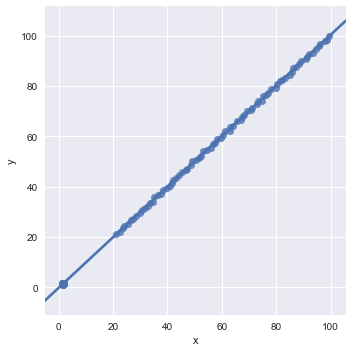

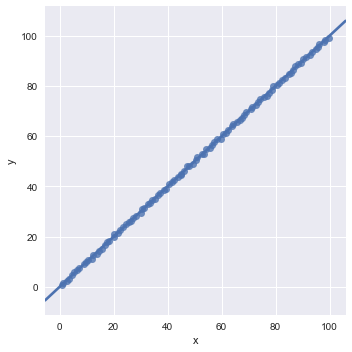

In [67]:
sns.lmplot(x="x", y="y", data=biased_df)
sns.lmplot(x="x", y="y", data=df)

In [68]:
## fit
lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))


0.142442848805


In [69]:
## biased fit
lm = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

0.156261014366


## Cross validation
#### Intro to cross validation with bike share data from last time. We will be modeling casual ridership. 

In [70]:
from sklearn import cross_validation
wd = '../../assets/dataset/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')
bikeshare.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [71]:
bikeshare.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


####Create dummy variables and set outcome (dependent) variable

In [72]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual 
modeldata.head()

,temp,hum,weather_1,weather_2,weather_3
0,0.24,0.81,1,0,0
1,0.22,0.80,1,0,0
2,0.22,0.80,1,0,0
3,0.24,0.75,1,0,0
4,0.24,0.75,1,0,0


#### Create a cross valiation with 5 folds

In [73]:
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)

In [74]:
type(kf)

sklearn.cross_validation.KFold

In [75]:
for train_index, test_index in kf:
    print type(train_index)    
    print train_index[0:33]  
    print test_index[0:33]    

<type 'numpy.ndarray'>
[ 0  2  3  4  6  7  8  9 10 11 12 13 16 19 20 22 23 25 27 28 29 30 31 32 33
 34 36 37 41 43 44 45 47]
[  1   5  14  15  17  18  21  24  26  35  38  39  40  42  46  48  49  50
  55  60  66  70  83 100 117 123 125 132 137 141 155 159 160]
<type 'numpy.ndarray'>
[ 1  2  4  5  6  8  9 12 13 14 15 16 17 18 20 21 22 23 24 25 26 27 28 30 31
 32 34 35 36 37 38 39 40]
[  0   3   7  10  11  19  29  33  54  56  61  75  77  78  91  92  94  95
  97 101 105 113 119 122 133 136 143 147 154 156 174 177 180]
<type 'numpy.ndarray'>
[ 0  1  2  3  5  6  7 10 11 14 15 17 18 19 21 22 23 24 25 26 27 28 29 31 33
 34 35 36 38 39 40 41 42]
[  4   8   9  12  13  16  20  30  32  37  53  68  69  71  74  76  81  93
 104 108 116 120 126 129 131 135 140 142 149 151 152 162 175]
<type 'numpy.ndarray'>
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 26 28
 29 30 31 32 33 35 37 38]
[  2  23  25  27  34  36  41  43  44  47  52  57  58  64  65  67  73  82
  85  86  88  90  96  

In [76]:
mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)
print 'STD of MSE for all folds:', np.std(mse_values)
print 'STD of R2 for all folds:', np.std(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 1785.43966147
R2: 0.311875748762
Model 2
MSE: 1555.75999804
R2: 0.311887385414
Model 3
MSE: 1759.78016928
R2: 0.31191055443
Model 4
MSE: 1686.31666308
R2: 0.311889076303
Model 5
MSE: 1579.67863831
R2: 0.311922859046
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1673.39502604
Mean of R2 for all folds: 0.311897124791
STD of MSE for all folds: 92.5247244226
STD of R2 for all folds: 1.70831806843e-05


In [77]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'R2: ', lm.score(modeldata, y)

~~~~ Single Model ~~~~
MSE of single model: 1672.58110765
R2:  0.311934605989


### Check
While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?


Answer: this score will be lower with the single model in the case, but we're trading off bias error for generalized error

###Advanced: There are ways to improve our model with regularization. 
Let's check out the effects on MSE and R2

In [78]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'OLS R2:', lm.score(modeldata, y)

lm = linear_model.Lasso().fit(modeldata, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Lasso R2:', lm.score(modeldata, y)

lm = linear_model.Ridge().fit(modeldata, y)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Ridge R2:', lm.score(modeldata, y)

~~~ OLS ~~~
OLS MSE:  1672.58110765
OLS R2: 0.311934605989
~~~ Lasso ~~~
Lasso MSE:  1725.41581608
Lasso R2: 0.290199495922
~~~ Ridge ~~~
Ridge MSE:  1672.60490113
Ridge R2: 0.311924817843


### Figuring out the alphas can be done by "hand"

In [79]:
alphas = np.logspace(-10, 10, 21)
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(modeldata))

Alpha: 1e-10
[ 112.68901765  -84.01121684  -24.68489063  -21.00314493  -21.71893628]
1672.58110765
Alpha: 1e-09
[ 112.68901765  -84.01121684  -24.68489061  -21.00314491  -21.71893626]
1672.58110765
Alpha: 1e-08
[ 112.68901765  -84.01121684  -24.6848904   -21.00314471  -21.71893606]
1672.58110765
Alpha: 1e-07
[ 112.68901763  -84.01121682  -24.68488837  -21.00314268  -21.71893403]
1672.58110765
Alpha: 1e-06
[ 112.68901745  -84.01121667  -24.68486804  -21.00312237  -21.71891373]
1672.58110765
Alpha: 1e-05
[ 112.68901562  -84.01121509  -24.68466472  -21.00291929  -21.71871079]
1672.58110765
Alpha: 0.0001
[ 112.68899732  -84.01119938  -24.68263174  -21.00088873  -21.71668162]
1672.58110765
Alpha: 0.001
[ 112.68881437  -84.01104228  -24.66232204  -20.98060316  -21.69640993]
1672.58110774
Alpha: 0.01
[ 112.68698753  -84.00947323  -24.46121539  -20.77973778  -21.49568404]
1672.58111645
Alpha: 0.1
[ 112.66896732  -83.99396383  -22.63109556  -18.95202277  -19.66942371]
1672.58185208
Alpha: 1.0
[

### Or we can use grid search to make this faster

In [80]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs.fit(modeldata, y)


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

##### Best score 

In [81]:
print gs.best_score_ 

-1814.09369133


##### mean squared error here comes in negative, so let's make it positive.

In [82]:
print -gs.best_score_ 

1814.09369133


##### explains which grid_search setup worked best

In [83]:
print gs.best_estimator_ 

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


##### shows all the grid pairings and their performances.

In [84]:
print gs.grid_scores_ 

[mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-10}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1.0000000000000001e-09}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-07}, mean: -1817.58711, std: 542.14317, params: {'alpha': 1.0000000000000001e-05}, mean: -1817.58707, std: 542.14331, params: {'alpha': 0.0001}, mean: -1817.58663, std: 542.14477, params: {'alpha': 0.001}, mean: -1817.58230, std: 542.15933, params: {'alpha': 0.01}, mean: -1817.54318, std: 542.30102, params: {'alpha': 0.10000000000000001}, mean: -1817.20111, std: 543.63587, params: {'alpha': 1.0}, mean: -1814.09369, std: 556.35563, params: {'alpha': 10.0}, mean: -1818.51694, std: 653.68607, params: {'alpha': 100.0}, mean: -2125.58777, std: 872.45270, params: {'alpha': 1000.0}, mean: -2458.08836, std: 951.30428, params: {'alpha': 10000.0}, me

#### Gradient Descent

In [85]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2 is better than 2.2
found better solution! using 1.2
0.2 is better than 1.2
found better solution! using 0.2
6.0 is closest to 6.2


For the DP example below, it might be a great idea for students to take the code and implement a stopping point, similar to what n_iter would do in gradient descent.

There can be a great conversation about stopping early and still _kinda_ getting the right result vs taking a longer time to solve and having a more precise model.

That solution is below.

In [86]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
n_iter = 0
while not optimized:
    if n_iter > 3:
        print 'stopping iterations'
        break
    n_iter += 1
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
stopping iterations


##Demo: Application of Gradient Descent 

In [87]:
lm = linear_model.SGDRegressor()
lm.fit(modeldata, y)
print "Gradient Descent R2:", lm.score(modeldata, y)
print "Gradient Descent MSE:", metrics.mean_squared_error(y, lm.predict(modeldata))

Gradient Descent R2: 0.308291561077
Gradient Descent MSE: 1681.43678932


###Check: Untuned, how well did gradient descent perform compared to OLS?

Previous Result (from above):
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1780.97924083
Mean of R2 for all folds: 0.306643649561

Answer: similar R2, MSE is lower for GR

#Independent Practice: Bike data revisited

There are tons of ways to approach a regression problem. The regularization techniques appended to ordinary least squares optimizes the size of coefficients to best account for error. Gradient Descent also introduces learning rate (how aggressively do we solve the problem), epsilon (at what point do we say the error margin is acceptable), and iterations (when should we stop no matter what?)

For this deliverable, our goals are to:

- implement the gradient descent approach to our bike-share modeling problem,
- show how gradient descent solves and optimizes the solution,
- demonstrate the grid_search module!

While exploring the Gradient Descent regressor object, you'll build a grid search using the stochastic gradient descent estimator for the bike-share data set. Continue with either the model you evaluated last class or the simpler one from today. In particular, be sure to implement the "param_grid" in the grid search to get answers for the following questions:

- With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
- Based on the data, we know when to properly use l1 vs l2 regularization. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true? If not, did gradient descent have enough iterations?
- How do these results change when you alter the learning rate (eta0)?

**Bonus**: Can you see the advantages and disadvantages of using gradient descent after finishing this exercise?

### Starter Code

In [88]:
params = {} # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1689.02636451
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
ALL ESTIMATORS
[mean: -1689.02636, std: 94.15777, params: {}]


### Independent Practice Solution

This code shows the variety of challenges and some student gotchas. The plots will help showcase what should be learned.

1. With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
2. We know when to properly use l1 vs l2 regularization based on the data. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true?
    * (if it didn't look like it, did gradient descent have enough iterations?)
3. How do results change when you alter the learning rate (power_t)?

In [89]:
%matplotlib inline

In [90]:
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas, } # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid[0] = grid[0].apply(lambda x: x['alpha'])
grid[1] = grid[1].apply(lambda x: -x)
grid.columns = ['alpha', 'mean_squared_error', 'cv']
    

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


KeyError: 0

With the alphas available, it looks like at mean squared error stays generally flat with incredibly small alpha values, but starting at $10^{-3}$, the error begins to elbow. We probably don't have much of a different in performance with other alpha values. 

In [ ]:
grid.plot('alpha', 'mean_squared_error', logx=True)

At alpha values of either .1 or 1, the l1_ratio works best closer to 1! Interesting. At other values of alpha they should see similar results, though the graphs aren't as clear.

In [ ]:
l1_2_ratios = [float(i) / 100 for i in range(0, 101, 5)]
print l1_2_ratios
params = {'l1_ratio':l1_2_ratios, 'penalty': ['elasticnet'], 'alpha': [.1], 'n_iter': [50]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid[0] = grid[0].apply(lambda x: x['l1_ratio'])
grid[1] = grid[1].apply(lambda x: -x)
grid.columns = ['l1_ratio', 'mean_squared_error', 'cv']
    

In [ ]:
gs.best_estimator_

In [ ]:
grid.plot('l1_ratio', 'mean_squared_error')

In [ ]:
learning = range(1, 50)
print learning
params = {'eta0':learning, 'n_iter': [50]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid[0] = grid[0].apply(lambda x: x['eta0'])
grid[1] = grid[1].apply(lambda x: -x)
grid.columns = ['eta0', 'mean_squared_error', 'cv']
    

Here it should be apparent that as the initial learning rate increases, the error should _also_ increase. And what happens when the initial learning rate is too high? A dramatic increase in error. Students should recognize the importance of learning rate and what values it should be set at, the smaller generally the better.

In [ ]:
grid.plot('eta0', 'mean_squared_error', logy=True)